<a href="https://colab.research.google.com/github/PrathameshBagal/Data-Science/blob/main/cse519_hw2_Bagal_Prathamesh_115612879.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Copy this notebook (if using Colab) via `File -> Save a Copy in Drive`.

## You can do this assignment outside of Colab (using your local Python installation) via `File -> Download`.

## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u>

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# First mount your drive before running these cells.
# Create a folder for the this HW and change to that dir
%cd drive/MyDrive/cse519

/content/drive/MyDrive/cse519


# Download data from Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse
files.upload()

Saving kaggle.json to kaggle (10).json


{'kaggle (10).json': b'{"username":"prathameshbagal2908","key":"7c39bd28bf8ec01c18c560e841a8e860"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle competitions download -c commonlit-evaluate-student-summaries

# Alternate: download data using gdown (if having issues with Kaggle)

In [ ]:
# !pip install gdown

In [ ]:
# import gdown
# url = 'https://drive.google.com/uc?id=164sQHZYvxU2XXPokrjzqv9MCGAMHaCIM'
# gdown.download(url)

# Extract data and install packages (regardless of data acquisition method)

In [ ]:
!unzip commonlit-evaluate-student-summaries.zip

In [ ]:
### TODO: Install required packages
### Student's code here
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
### END

## **Section 1: Library and Data Imports (Q1, 5 points)**

- Import your libraries and join the data from both `summaries_train.csv` and `prompts_train.csv` into a single dataframe with the same structure as `use_cols`. Print the head of the dataframe. **Do not modify `use_cols`.**

In [ ]:
use_cols = ["student_id",
            "prompt_id",
            "text",
            "content",
            "wording",
            "prompt_question",
            "prompt_title",
            "prompt_text"
           ]
dtypes = {
        'student_id':                                    'string',
        'prompt_id':                                     'string',
        'text':                                          'string',
        'content':                                       'Float64',
        'wording':                                       'Float64',
        'prompt_question':                               'string',
        'prompt_title':                                  'string',
        'prompt_text':                                   'string',
        }

In [ ]:
### TODO: Load required packages
### Student's code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
###

# Reading both the csv files and storing them temporarily
prompts_train = pd.read_csv("prompts_train.csv")
summaries_train= pd.read_csv("summaries_train.csv")

#  Merging both of them on prompt_id to make df structure as that of use_cols


In [ ]:
prompts_train

In [ ]:
summaries_train

In [ ]:
df = summaries_train.merge(prompts_train,on="prompt_id")
df

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"It has to be made on a complex storyline, with...",-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
7161,ff0f65eecf02,39c16e,Aristotle descirbes an ideal tradgedy as being...,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
7162,ff186473ea0a,39c16e,A tragedy should have a complex plan not a sim...,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
7163,ff5e9e6068da,39c16e,Aristotle believed that the ideal tradegy shou...,-0.157460,-0.165811,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...


In [ ]:
#  Removing special characters
df["prompt_text"]= df["prompt_text"].str.replace("\W"," ", regex=True)
df

## **Section 2: Features (Q2 and Q3, 25 points total)**

In [ ]:
task2Table= pd.DataFrame()
N= len(df)

# for Q 2.1. Total words in "text" and "prompt_text"
totalTextLength=[]
totalPromptLength=[]

# for 2.2.  Distinct words in "prompt_text" and "text"
distinctTextLength=[0 for _ in range(N)]
distinctPromptLength=[ 0 for _ in range(N)]

# for 2.3.  for common words in "text" and "prompt_text"
commTextPromptText=[]

# for 2.4   Common words in"text" and "prompt_question"
commTextPromptQ=[]

# for 2.5 common words in "text" and "prompt_title"
commTextPromptTitle=[]

text=[]
# Common for loop for all the questions
for i in range(N):
# Q 2.1

  # Calculating total words in the "text" column
  totalTextLength.append((len(df.loc[i]["text"].split())))

  # Calculating total words in the "prompt_text" column
  totalPromptLength.append((len(df.loc[i]["prompt_text"].split())))


# Q 2.2
  # Calculating unique words in "text"
  uniqueText=len(set(df.loc[i]["text"].split()))
  distinctTextLength[i]=uniqueText

 # Calculating unique words in "prompt_text"
  uniquePrompt= len(set(df.loc[i]["prompt_text"].split()))
  distinctPromptLength = uniquePrompt



#Q 2.3
  # Calculating common words in "text" and "prompt_text"
  textPromptTextCommon=0

  for word in set(df.loc[i]["text"].split()):
    if word in set(df.loc[i]["prompt_text"].split()):
      textPromptTextCommon+=1
  commTextPromptText.append(textPromptTextCommon)


# Q 2.4
  # Calculating common words in "text" and "prompt_question"
  textPromptQCommon=0

  for word in set(df.loc[i]["text"].split()):
    if word in set(df.loc[i]["prompt_question"].split()):
      textPromptQCommon+=1
  commTextPromptQ.append(textPromptQCommon)



# Q 2.5
# Calculating common words in "text" and "prompt_title"
  textPromptTitleCommon=0
  for word in set(df.loc[i]["text"].split()):
    if word in set(df.loc[i]["prompt_title"].split()):
      textPromptTitleCommon+=1
  commTextPromptTitle.append(textPromptTitleCommon)



task2Table["totalTextLength"]= totalTextLength
task2Table["totalPromptLength"]= totalPromptLength
task2Table["distinctTextLength"]=distinctTextLength
task2Table["distinctPromptLength"]=distinctPromptLength
task2Table["commTextPromptText"]= commTextPromptText
task2Table["commTextPromptQ"]= commTextPromptQ
task2Table["commTextPromptTitle"]= commTextPromptTitle
task2Table.head(10)


# **Section 2, Question 3, Additional features**




While deciding the features for this section I took some ideads from the question itself, the discussions in the lectures and some online research. I came up with a combination of readability indices, number of difficult words per summary and the character lengths of the summaries as well.

My thought process with the readability indices

The features I will be adding are the "Flesch Reading ease", the number of difficult words in each summary.

In [ ]:
!git clone https://github.com/andrei-papou/textstat.git
!cd textstat; pip install . --target=/kaggle/working/package

In [ ]:
import sys
sys.path.append("/kaggle/working/package")

methods = ["flesch_reading_ease",
           "dale_chall_readability_score",
           "difficult_words",
           ]


https://www.kaggle.com/code/kononenko/pip-install-textstat-mit

In [ ]:
import textstat
textData= df["text"][:N]
fleschReadingEase=[None]*N
daleChallReadabilityScore=[None]*N
difficultWords=[None]*N
i=0
for text in textData:

  for  method in methods:
    res = getattr(textstat, method)(text)

    if method=="flesch_reading_ease":fleschReadingEase[i]=res
    elif method=="dale_chall_readability_score":daleChallReadabilityScore[i]=res
    else:difficultWords[i]=res

  i+=1

In [ ]:
additionalFeatures=pd.DataFrame()

additionalFeatures["fleschReadingEase"]= fleschReadingEase
additionalFeatures["daleChallReadabilityScore"]= daleChallReadabilityScore
additionalFeatures["difficultWords"]= difficultWords


In [ ]:
# Adding a new column to count the letters in a summary
additionalFeatures["textLetters"]= df["text"].str.len()

In [ ]:
#  Finding similarity between the prompt and the summary

similarity=[None]*N

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create TF-IDF vectors for the original content and summary
tfidf_vectorizer = TfidfVectorizer()

for i in range(N):
  tfidf_matrix = tfidf_vectorizer.fit_transform([df["text"][i], df["prompt_text"][i]])

  # Calculate cosine similarity
  similarity[i] = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]

additionalFeatures['similarity']=similarity
additionalFeatures

,fleschReadingEase,daleChallReadabilityScore,difficultWords,textLetters,similarity
0,55.95,7.76,11,346,0.414777
1,56.76,8.24,36,1225,0.714402
2,67.76,8.71,12,345,0.513356
3,45.80,8.84,13,451,0.670896
4,74.69,7.81,5,145,0.450628
...,...,...,...,...,...
7160,46.44,10.54,9,180,0.278090
7161,57.95,9.34,7,163,0.335654
7162,87.01,6.30,3,150,0.317723
7163,46.47,9.92,15,297,0.524103


In [ ]:
print(df['wording'].corr(additionalFeatures["textLetters"]),additionalFeatures["textLetters"].corr(df["content"]))
print(additionalFeatures["similarity"].corr(df["wording"]),additionalFeatures["similarity"].corr(df["content"]))
print(additionalFeatures["fleschReadingEase"].corr(df["wording"]),additionalFeatures["fleschReadingEase"].corr(df["content"]))

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
def countAdj(text):
    words = nltk.word_tokenize(text)
    tagged_words = nltk.pos_tag(words)
    adjectives = [word for word, pos in tagged_words if pos == 'JJ']
    return len(adjectives)

additionalFeatures['adjectives'] = df["text"].apply(countAdj)


In [ ]:
additionalFeatures

,fleschReadingEase,daleChallReadabilityScore,difficultWords,textLetters,similarity,adjectives
0,55.95,7.76,11,346,0.414777,5
1,56.76,8.24,36,1225,0.714402,6
2,67.76,8.71,12,345,0.513356,1
3,45.80,8.84,13,451,0.670896,4
4,74.69,7.81,5,145,0.450628,4
...,...,...,...,...,...,...
7160,46.44,10.54,9,180,0.278090,3
7161,57.95,9.34,7,163,0.335654,2
7162,87.01,6.30,3,150,0.317723,4
7163,46.47,9.92,15,297,0.524103,9


## **Section 3: Content and Wording (Q4, 10 points)**

In [ ]:
evalMetricsDf= pd.DataFrame()
evalMetricsDf["content"] = df["content"]
evalMetricsDf['wording']= df['wording']
evalMetricsDf

In [ ]:
#BEGIN[Matplotlib documentation][https://matplotlib.org/stable/gallery/statistics/hist.html#sphx-glr-gallery-statistics-hist-py]"How to make histograms in Matplotlib"

# Plot histogram
plt.hist(df["content"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Content')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

#END[Matplotlib docmunetation]


In [ ]:
plt.hist(df["wording"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Wording')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [ ]:
plt.hist(df.loc[df["prompt_id"]=="814d6b"]["content"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Wording')
plt.ylabel('Frequency')
plt.title("Prompt 814d6b")
plt.show()
# df.loc[df["prompt_id"]=="814d6b"]["content"]

In [ ]:
contentMean = df["content"].mean()
contentDeviation = df["content"].std()
print(f"Mean of content is : {contentMean} and the standard deviation is {contentDeviation}")

In [ ]:
wordingMean = df["wording"].mean()
wordingDeviation = df["wording"].std()
print(f"Mean of wording is : {wordingMean} and the standard deviation is {wordingDeviation}")

In [ ]:
#  Scatter plot between content and wording score
plt.scatter(df["content"], df["wording"])
plt.title("Scatter plot of Wording and content")
plt.show()
# The scatter plot between content and wording score clearly indicates that there is a positive correlation between the two variables

In [ ]:
# The corrlation between the content score and the wording score of the summary is 0.75
df["content"].corr(df["wording"])

In [ ]:
uniquePromptsId=list(prompts_train["prompt_id"])
(uniquePromptsId)

## **Section 4: Words in Good and Bad Essays (Q5, 10 points)**

 I personally feel that most of the summaries would have common words like "a", "the", "and",etc. These words would be the most popular in most summaries regardless of their content or wording score. I have therefore made the decision of removing the stop words before calculating the most common words in good and bad essays.


In [ ]:
!pip install nltk

https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):

    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word.lower() not in stop_words]
    new_text = " ".join(words)
    return (new_text)


additionalFeatures['cleanedText'] = df['text'].apply(remove_stopwords)
additionalFeatures


In [ ]:
df


Now to find the most common words in good and bad summaries, I will segregate the summaries based on the content and wording score. All summaries with content and wording > their respective mean values are classified as good and all with content and wording < their respective mean values are classifies as bad

In [ ]:
goodSummaries = df.loc[df["content"] > contentMean]

goodSummaries = goodSummaries.loc[goodSummaries["wording"] > wordingMean]
print(len(goodSummaries))
goodSummaries["cleanedText"]= goodSummaries["text"].apply(remove_stopwords)
goodSummaries

In [ ]:
badSummaries = df.loc[df["content"] < contentMean]
badSummaries = badSummaries.loc[badSummaries["wording"] < wordingMean]
print(len(badSummaries))
badSummaries["cleanedText"]= badSummaries["text"].apply(remove_stopwords)
badSummaries

In [ ]:

#  Calculating the frequencies of all words in the summaries with content and wording greater than their means
from collections import Counter

#  Punctuation marks to be removed
punctuation = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

goodText = ""

for i in range(len(goodSummaries)):
  summary = goodSummaries.iloc[i]["cleanedText"]

  #  Removing punctuation marks
  for ele in summary:
    if ele in punctuation:
      summary = summary.replace(ele,"")

  goodText += ''.join(summary).lower()

goodFreq= Counter(goodText.split())


In [ ]:
#  Calculating the frequencies of all words in the summaries with content and wording less than their respective means

badText = ""

for i in range(len(badSummaries)):
  summary = badSummaries.iloc[i]["cleanedText"]

  # Removing punctuation marks
  for ele in summary:
    if ele in punctuation:
      summary = summary.replace(ele,"")

  badText += ''.join(summary).lower()


badFreq= Counter(badText.split())


In [ ]:
# Identifying the distinguishing words in good and bad summaries

# If the freq of a word is more in the good summaries than in the bad ones,
# then the word has been added to the good part in the distinguished words and vice versa for the bad ones

distinguishingWords = {
    'good': {word: freq for word, freq in goodFreq.items() if freq > badFreq.get(word, 0)},
    'bad': {word: freq for word, freq in badFreq.items() if freq > goodFreq.get(word, 0)}
}



The list of good words we have derived will have a lot of words with very low frequencies. These words would not be able to indicate which words actually have an impact on the score of the summary. To solve this problem, what I have done is that I have calculated the mean and the standard deviation of all the frequencies in the good and bad words dictionary. I have only selected the words with frequency > mean + 2 standard deviations for good and bad words. This would help me indicate the words that occur in good and bad summaries and in the highest amount.

In [ ]:

goodWordMean = sum(list(distinguishingWords["good"].values()))/len(distinguishingWords["good"])
goodFreqStdDev= np.std(list(distinguishingWords["good"].values()))

goodWords= {}

for word,freq in distinguishingWords["good"].items():
  if (freq > goodWordMean + 2*goodFreqStdDev):
    goodWords[word]=freq

(list(goodWords.keys()))

In [ ]:
badWordMean = sum(list(distinguishingWords["bad"].values()))/len(distinguishingWords["bad"])
badWordStdDev= np.std(list(distinguishingWords["bad"].values()))

badWords= {}

for word,freq in distinguishingWords["bad"].items():
  if (freq > badWordMean + 2*badWordStdDev):
    badWords[word]=freq

list(badWords.keys())

## **Section 5: Three Interesting Plots (Q6, 15 points)**

In [ ]:
# Recalculating the length of the summary for the cleaned text after the removal of stop words.
additionalFeatures["textLetters"]= additionalFeatures["cleanedText"].str.len()
additionalFeatures

In [ ]:
print(additionalFeatures["daleChallReadabilityScore"].corr(df["content"]))
additionalFeatures["daleChallReadabilityScore"].corr(df["wording"])

In [ ]:
print(additionalFeatures["fleschReadingEase"].corr(df["content"]))
additionalFeatures["fleschReadingEase"].corr(df["wording"])

Trying to identify the metrics with the highest correlation with the content score.

In [ ]:
print(additionalFeatures["adjectives"].corr(df["content"]))
additionalFeatures["adjectives"].corr(df["wording"])

0.6750944487533752


0.4602280078251189

# **Plot 1**

I have calculated the correlation between the various features I have added in Q3 and selected the features with the most correlation with the Content Score.

In [ ]:
featureDf= pd.DataFrame()
featureDf["content"] = df["content"]
# featureDf["wording"] = df["wording"]
featureDf["difficultWords"] = additionalFeatures["difficultWords"]
# featureDf["similarity"] = additionalFeatures["similarity"]
featureDf["adjectives"] = additionalFeatures["adjectives"]
featureDf

,content,difficultWords,adjectives
0,0.205683,11,5
1,3.272894,36,6
2,0.205683,12,1
3,0.567975,13,4
4,-0.910596,5,4
...,...,...,...
7160,-0.981265,9,3
7161,-0.511077,7,2
7162,-0.834946,3,4
7163,-0.157460,15,9




1.  As shown in the correlation matrix and the scatter plots, the correlation between difficult words and content is 0.73. This was very surprising for me as I  thought that a good summary would comprise words that are easy to understand and hence have very low or even negative correlation for difficult words and content score.

2.   Another metric that revealed something interesting to me was the correlation between the length of the summary and the content score. It is somewhat obvious that a longer summary would summarize the prompt without missing too many details, but 0.79 correlation was way higher than I expected from such a trivial metric.






In [ ]:
sns.heatmap(featureDf.corr(),annot= True)
plt.title("Correlation Matrix")
plt.show()


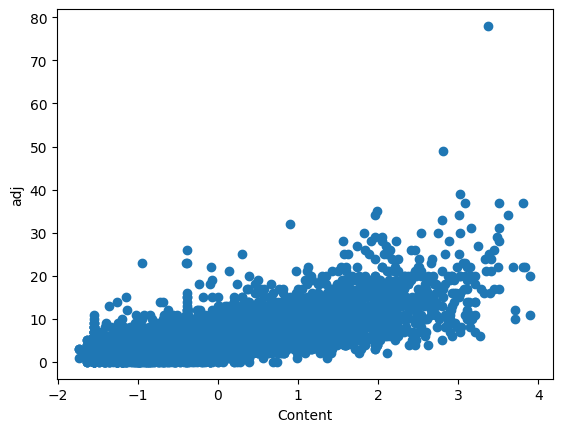

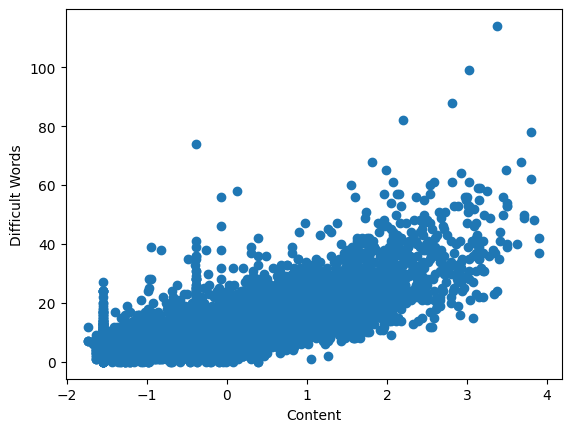

In [ ]:

plt.scatter(df["content"], additionalFeatures["adjectives"])
plt.xlabel("Content")
plt.ylabel("adj")
plt.show()


plt.scatter(df["content"], additionalFeatures["difficultWords"])
plt.xlabel("Content")
plt.ylabel("Difficult Words")
plt.show()

# **Plot 2**

For the second plot I will try and understand the impact of readability indexes on the content score of the summaries. When considering these featuress during Q3 I expected them to have a considerable impact on the scores of the summaries as these indices rate the summaries based on how easily they can be understood.

For that I will create a new dataframe with the two readability indices that I have calculated for Q3 and the content and wording score.

In [ ]:
plot2Df=pd.DataFrame()
plot2Df["fleschReadingEase"]= additionalFeatures["fleschReadingEase"]
plot2Df["daleChallReadabilityScore"]= additionalFeatures["daleChallReadabilityScore"]
plot2Df["content"]= df['content']
plot2Df["wording"]=df["wording"]
plot2Df

NameError: ignored

As seen in the correlation matrix, the correlation between the content and wording score and the readability indices is almost 0. All correlation between the scores and indices are in the range -0.09 to 0.04. I did not expect this at all. I felt that of the 5 factors I picked in Q3, these 2 indices would have the highest influence on the summary scores but so far it has been the complete opposite.



In [ ]:
sns.heatmap(plot2Df.corr(),annot=True)
plt.show()

As we see in the scatter plots below, there is no relevant correlation between the readability indices and the content score.

This discovery is actually very helpful as I plan to build a model because I now know that these 2 factors would not add any relevant information for the prediction and hence I will not consider them for the prediction model.

In [ ]:
plt.scatter(df["content"], additionalFeatures["daleChallReadabilityScore"])
plt.xlabel("Content")
plt.ylabel(" daleChallReadabilityScore")
plt.show()

plt.scatter(df["content"], additionalFeatures["fleschReadingEase"])
plt.xlabel("Content")
plt.ylabel(" fleschReadingEase")
plt.show()

## **Section 6: Baseline Model (Q7, 10 points)**

In [ ]:
task2Table


In [ ]:
X = task2Table.values
X

In [ ]:
y1= df["content"]
y2= df["wording"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)


contentModel0 = LinearRegression()
contentModel0.fit(X_train, y_train)

y_pred = contentModel0.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for content baseline model:", mse)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Train a multiple linear regression model
wordingModel0 = LinearRegression()
wordingModel0.fit(X_train, y_train)

# Predict on the test set
y_pred = wordingModel0.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for wording baseline model:", mse)

## **Section 7: Feature Cleaning and Additional Models (Q8 & Q9, 20 points total)**

In [ ]:
df

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
...,...,...,...,...,...,...,...,...
7160,fef3e85236e5,39c16e,"It has to be made on a complex storyline, with...",-0.981265,-1.548900,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
7161,ff0f65eecf02,39c16e,Aristotle descirbes an ideal tradgedy as being...,-0.511077,-1.589115,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
7162,ff186473ea0a,39c16e,A tragedy should have a complex plan not a sim...,-0.834946,-0.593749,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
7163,ff5e9e6068da,39c16e,Aristotle believed that the ideal tradegy shou...,-0.157460,-0.165811,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...


In [ ]:
task2Table

,totalTextLength,totalPromptLength,distinctTextLength,distinctPromptLength,commTextPromptText,commTextPromptQ,commTextPromptTitle,student_id
0,61,601,51,273,23,5,1,000e8c3c7ddb
1,203,601,138,273,46,9,3,0070c9e7af47
2,60,601,50,273,27,5,1,0095993991fe
3,76,601,59,273,35,7,1,00c20c6ddd23
4,27,601,25,273,14,5,1,00d40ad10dc9
...,...,...,...,...,...,...,...,...
7160,33,600,30,273,21,0,0,fef3e85236e5
7161,30,600,27,273,18,3,0,ff0f65eecf02
7162,29,600,22,273,17,0,0,ff186473ea0a
7163,49,600,35,273,20,2,0,ff5e9e6068da


In [ ]:
task2Table["student_id"]= df[ "student_id"]

In [ ]:
additionalFeatures["student_id"]= df["student_id"]
additionalFeatures

,fleschReadingEase,daleChallReadabilityScore,difficultWords,textLetters,similarity,cleanedText,student_id
0,55.95,7.76,11,346,0.414777,third wave experimentto see people reacted new...,000e8c3c7ddb
1,56.76,8.24,36,1225,0.714402,Third Wave developed rapidly students genuinly...,0070c9e7af47
2,67.76,8.71,12,345,0.513356,third wave started experiment within class slo...,0095993991fe
3,45.80,8.84,13,451,0.670896,experimen orginally even terrible thngs happen...,00c20c6ddd23
4,74.69,7.81,5,145,0.450628,third wave developed quickly due students part...,00d40ad10dc9
...,...,...,...,...,...,...,...
7160,46.44,10.54,9,180,0.278090,"made complex storyline, plot makes audience fe...",fef3e85236e5
7161,57.95,9.34,7,163,0.335654,Aristotle descirbes ideal tradgedy one complex...,ff0f65eecf02
7162,87.01,6.30,3,150,0.317723,tragedy complex plan simple one.A good plot pl...,ff186473ea0a
7163,46.47,9.92,15,297,0.524103,Aristotle believed ideal tradegy include purga...,ff5e9e6068da


In [ ]:
finalDf=additionalFeatures.merge(task2Table, on="student_id")
finalDf

,fleschReadingEase,daleChallReadabilityScore,difficultWords,textLetters,similarity,cleanedText,student_id,totalTextLength,totalPromptLength,distinctTextLength,distinctPromptLength,commTextPromptText,commTextPromptQ,commTextPromptTitle
0,55.95,7.76,11,346,0.414777,third wave experimentto see people reacted new...,000e8c3c7ddb,61,601,51,273,23,5,1
1,56.76,8.24,36,1225,0.714402,Third Wave developed rapidly students genuinly...,0070c9e7af47,203,601,138,273,46,9,3
2,67.76,8.71,12,345,0.513356,third wave started experiment within class slo...,0095993991fe,60,601,50,273,27,5,1
3,45.80,8.84,13,451,0.670896,experimen orginally even terrible thngs happen...,00c20c6ddd23,76,601,59,273,35,7,1
4,74.69,7.81,5,145,0.450628,third wave developed quickly due students part...,00d40ad10dc9,27,601,25,273,14,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,46.44,10.54,9,180,0.278090,"made complex storyline, plot makes audience fe...",fef3e85236e5,33,600,30,273,21,0,0
7161,57.95,9.34,7,163,0.335654,Aristotle descirbes ideal tradgedy one complex...,ff0f65eecf02,30,600,27,273,18,3,0
7162,87.01,6.30,3,150,0.317723,tragedy complex plan simple one.A good plot pl...,ff186473ea0a,29,600,22,273,17,0,0
7163,46.47,9.92,15,297,0.524103,Aristotle believed ideal tradegy include purga...,ff5e9e6068da,49,600,35,273,20,2,0


In [ ]:
finalDf["cleanedTextCharLength"]= finalDf["textLetters"]
finalDf

,fleschReadingEase,daleChallReadabilityScore,difficultWords,textLetters,similarity,cleanedText,student_id,totalTextLength,totalPromptLength,distinctTextLength,distinctPromptLength,commTextPromptText,commTextPromptQ,commTextPromptTitle,cleanedTextCharLength
0,55.95,7.76,11,346,0.414777,third wave experimentto see people reacted new...,000e8c3c7ddb,61,601,51,273,23,5,1,346
1,56.76,8.24,36,1225,0.714402,Third Wave developed rapidly students genuinly...,0070c9e7af47,203,601,138,273,46,9,3,1225
2,67.76,8.71,12,345,0.513356,third wave started experiment within class slo...,0095993991fe,60,601,50,273,27,5,1,345
3,45.80,8.84,13,451,0.670896,experimen orginally even terrible thngs happen...,00c20c6ddd23,76,601,59,273,35,7,1,451
4,74.69,7.81,5,145,0.450628,third wave developed quickly due students part...,00d40ad10dc9,27,601,25,273,14,5,1,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,46.44,10.54,9,180,0.278090,"made complex storyline, plot makes audience fe...",fef3e85236e5,33,600,30,273,21,0,0,180
7161,57.95,9.34,7,163,0.335654,Aristotle descirbes ideal tradgedy one complex...,ff0f65eecf02,30,600,27,273,18,3,0,163
7162,87.01,6.30,3,150,0.317723,tragedy complex plan simple one.A good plot pl...,ff186473ea0a,29,600,22,273,17,0,0,150
7163,46.47,9.92,15,297,0.524103,Aristotle believed ideal tradegy include purga...,ff5e9e6068da,49,600,35,273,20,2,0,297


In [ ]:
finalDf=finalDf.drop(["student_id","cleanedText","textLetters","distinctPromptLength"], axis=1)
finalDf

,fleschReadingEase,daleChallReadabilityScore,difficultWords,similarity,totalTextLength,totalPromptLength,distinctTextLength,commTextPromptText,commTextPromptQ,commTextPromptTitle,cleanedTextCharLength
0,55.95,7.76,11,0.414777,61,601,51,23,5,1,346
1,56.76,8.24,36,0.714402,203,601,138,46,9,3,1225
2,67.76,8.71,12,0.513356,60,601,50,27,5,1,345
3,45.80,8.84,13,0.670896,76,601,59,35,7,1,451
4,74.69,7.81,5,0.450628,27,601,25,14,5,1,145
...,...,...,...,...,...,...,...,...,...,...,...
7160,46.44,10.54,9,0.278090,33,600,30,21,0,0,180
7161,57.95,9.34,7,0.335654,30,600,27,18,3,0,163
7162,87.01,6.30,3,0.317723,29,600,22,17,0,0,150
7163,46.47,9.92,15,0.524103,49,600,35,20,2,0,297


In [ ]:
temp= finalDf.values
print(np.any(temp < 0))

True


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming X is your dataset (features)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(finalDf)
X_scaled

array([[0.72116929, 0.45554124, 0.09649123, ..., 0.3125    , 0.25      ,
        0.06063774],
       [0.72550594, 0.48646907, 0.31578947, ..., 0.5625    , 0.75      ,
        0.2903816 ],
       [0.78439876, 0.51675258, 0.10526316, ..., 0.3125    , 0.25      ,
        0.06037637],
       ...,
       [0.88746118, 0.36146907, 0.02631579, ..., 0.        , 0.        ,
        0.0094093 ],
       [0.67041439, 0.59471649, 0.13157895, ..., 0.125     , 0.        ,
        0.04783063],
       [0.83311918, 0.40786082, 0.05263158, ..., 0.125     , 0.        ,
        0.04704652]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y2, test_size=0.2, random_state=42)

# Train a multiple linear regression model
wordingModelV2 = LinearRegression()
wordingModelV2.fit(X_train, y_train)

# Predict on the test set
y_pred = wordingModelV2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for wording baseline model:", mse)

Mean Squared Error for wording baseline model: 0.4864403396496768


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.2, random_state=42)

# Train a multiple linear regression model
wordingModelV2 = LinearRegression()
wordingModelV2.fit(X_train, y_train)

# Predict on the test set
y_pred = wordingModelV2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for wording baseline model:", mse)

Mean Squared Error for wording baseline model: 0.3030405210085022


In [ ]:
X_scaled
print(np.any(X_scaled < 0))

False


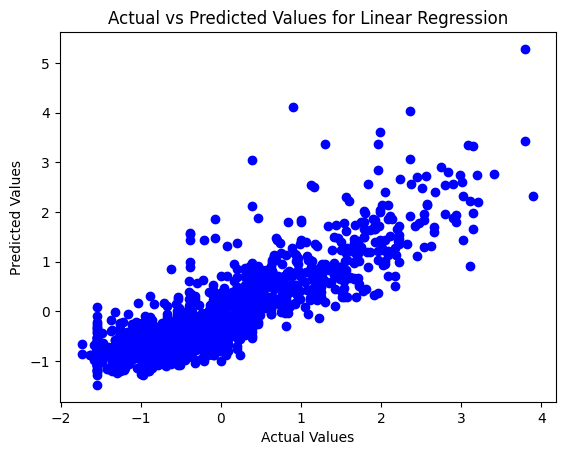

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Linear Regression')
plt.show()

In [ ]:
import numpy as np
import pandas as pd



# Apply log transformation to each variable
transformed_data = np.log(finalDf + 1)  # Adding 1 to handle zero values

# print("Original Data:")
# print(finalDf)
# print("\nTransformed Data:")
# print(transformed_data)
transformed_data

,fleschReadingEase,daleChallReadabilityScore,difficultWords,similarity,totalTextLength,totalPromptLength,distinctTextLength,commTextPromptText,commTextPromptQ,commTextPromptTitle,cleanedTextCharLength
0,4.042174,2.170196,2.484907,0.346972,4.127134,6.400257,3.951244,3.178054,1.791759,0.693147,5.849325
1,4.056296,2.223542,3.610918,0.539064,5.318120,6.400257,4.934474,3.850148,2.302585,1.386294,7.111512
2,4.230622,2.273156,2.564949,0.414329,4.110874,6.400257,3.931826,3.332205,1.791759,0.693147,5.846439
3,3.845883,2.286456,2.639057,0.513360,4.343805,6.400257,4.094345,3.583519,2.079442,0.693147,6.113682
4,4.326646,2.175887,1.791759,0.371997,3.332205,6.400257,3.258097,2.708050,1.791759,0.693147,4.983607
...,...,...,...,...,...,...,...,...,...,...,...
7160,3.859466,2.445819,2.302585,0.245367,3.526361,6.398595,3.433987,3.091042,0.000000,0.000000,5.198497
7161,4.076690,2.336020,2.079442,0.289421,3.433987,6.398595,3.332205,2.944439,1.386294,0.000000,5.099866
7162,4.477450,1.987874,1.386294,0.275905,3.401197,6.398595,3.135494,2.890372,0.000000,0.000000,5.017280
7163,3.860098,2.390596,2.772589,0.421406,3.912023,6.398595,3.583519,3.044522,1.098612,0.000000,5.697093


In [ ]:
finalDf

,fleschReadingEase,daleChallReadabilityScore,difficultWords,similarity,totalTextLength,totalPromptLength,distinctTextLength,commTextPromptText,commTextPromptQ,commTextPromptTitle,cleanedTextCharLength
0,55.95,7.76,11,0.414777,61,601,51,23,5,1,346
1,56.76,8.24,36,0.714402,203,601,138,46,9,3,1225
2,67.76,8.71,12,0.513356,60,601,50,27,5,1,345
3,45.80,8.84,13,0.670896,76,601,59,35,7,1,451
4,74.69,7.81,5,0.450628,27,601,25,14,5,1,145
...,...,...,...,...,...,...,...,...,...,...,...
7160,46.44,10.54,9,0.278090,33,600,30,21,0,0,180
7161,57.95,9.34,7,0.335654,30,600,27,18,3,0,163
7162,87.01,6.30,3,0.317723,29,600,22,17,0,0,150
7163,46.47,9.92,15,0.524103,49,600,35,20,2,0,297


In [ ]:
X = transformed_data.values

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

ValueError: ignored

## **Section 8: Kaggle Submission Screenshots (Q10, 5 points)**

Public Score:

Private Score:

Kaggle profile link:

Screenshot(s):